In [29]:
# importação das bibliotecas

import pandas as pd
import numpy as np
from numpy import mean , median
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime , date
from pylab import rcParams

In [94]:
# importação das bases de dados

# importações 2019 a 2021
df_imp19 = pd.read_csv('E:/Projects/case_FortBrasil/data/IMP_2019_MUN.csv', sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)
df_imp20 = pd.read_csv('E:/Projects/case_FortBrasil/data/IMP_2020_MUN.csv', sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)
df_imp21 = pd.read_csv('E:/Projects/case_FortBrasil/data/IMP_2021_MUN.csv', sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)

# exportações 2019 a 2021
df_exp19 = pd.read_csv('E:/Projects/case_FortBrasil/data/EXP_2019_MUN.csv' , sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)
df_exp20 = pd.read_csv('E:/Projects/case_FortBrasil/data/EXP_2020_MUN.csv' , sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)
df_exp21 = pd.read_csv('E:/Projects/case_FortBrasil/data/IMP_2021_MUN.csv' , sep = ';', engine='python', encoding='utf-8', error_bad_lines=False)

# tabela dimensão
df_sh = pd.read_excel('E:/Projects/case_FortBrasil/data/TABELAS_AUXILIARES.xlsx', sheet_name='1',usecols=['CO_SH4','NO_SH4_POR'])
df_sh = df_sh.drop_duplicates(['CO_SH4'])
df_pais = pd.read_excel('E:/Projects/case_FortBrasil/data/TABELAS_AUXILIARES.xlsx', sheet_name='11')
df_mun = pd.read_excel('E:/Projects/case_FortBrasil/data/TABELAS_AUXILIARES.xlsx', sheet_name='14')

In [95]:
# unindo as bases de dados

df_imp = pd.concat([df_imp19, df_imp20, df_imp21] , ignore_index=True)
df_exp = pd.concat([df_exp19, df_exp20, df_exp21] , ignore_index=True)

In [96]:
# concatenando as bases dimensão e fato: código país com nome do país

df_imp = df_imp.merge(df_pais[['CO_PAIS','CO_PAIS_ISOA3','NO_PAIS','NO_PAIS_ING']] , on='CO_PAIS', how='left')
df_exp = df_exp.merge(df_pais[['CO_PAIS','CO_PAIS_ISOA3','NO_PAIS','NO_PAIS_ING']] , on='CO_PAIS', how='left')

In [97]:
# concatenando as bases dimensão e fato: código SH4 com a descrição do produto

df_imp = df_imp.merge(df_mun[['CO_MUN_GEO','NO_MUN']] , left_on='CO_MUN', right_on='CO_MUN_GEO', how='left')
df_exp = df_exp.merge(df_mun[['CO_MUN_GEO','NO_MUN']] , left_on='CO_MUN', right_on='CO_MUN_GEO', how='left')

In [101]:
# concatenando as bases dimensão e fato: código SH4 com a descrição do produto

df_imp = df_imp.merge(df_sh , left_on='SH4', right_on='CO_SH4', how='left')
df_exp = df_exp.merge(df_sh , left_on='SH4', right_on='CO_SH4', how='left')

In [102]:
# transformando os dados de data para a base de importações

df_imp['CO_MES'] = df_imp['CO_MES'].apply(lambda x: str(x))
df_imp['CO_ANO'] = df_imp['CO_ANO'].apply(lambda x: str(x))
df_imp['DATA'] = df_imp['CO_ANO'] +'-' + df_imp['CO_MES'] 
df_imp['DATA'] = df_imp['DATA'].apply(lambda x: datetime.strptime(x, '%Y-%m'))

In [103]:
# transformando os dados de data para a base de exportações

df_exp['CO_MES'] = df_exp['CO_MES'].apply(lambda x: str(x))
df_exp['CO_ANO'] = df_exp['CO_ANO'].apply(lambda x: str(x))
df_exp['DATA'] = df_exp['CO_ANO'] +'-' + df_exp['CO_MES'] 
df_exp['DATA'] = df_exp['DATA'].apply(lambda x: datetime.strptime(x, '%Y-%m'))

In [104]:
# análise para os últimos 2 anos: 06/2019 a 06/2021
df_imp = df_imp.loc[df_imp['DATA']>=datetime(2019,6,1)]
df_exp = df_exp.loc[df_exp['DATA']>=datetime(2019,6,1)]

# Análise Exploratória de Dados

## **Países**

Text(0.5, 1.0, 'TOP 5 Países de Importações')

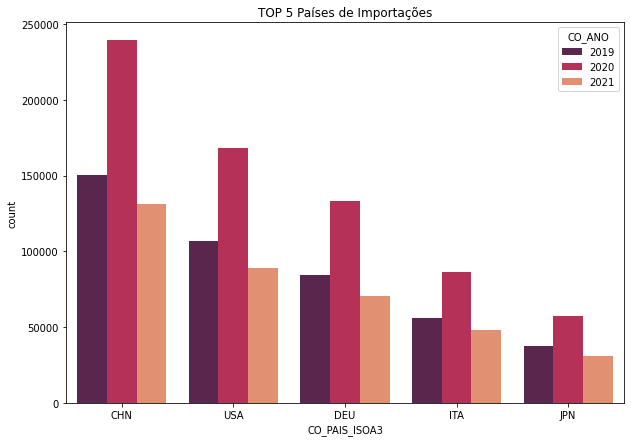

In [106]:
# contagem de importações por país TOP5 por ano
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_imp, x='CO_PAIS_ISOA3', palette="rocket", hue='CO_ANO',
              order=df_imp.CO_PAIS_ISOA3.value_counts().iloc[:5].index).set_title('TOP 5 Países de Importações')

Text(0.5, 1.0, 'TOP 5 Países de Exportações')

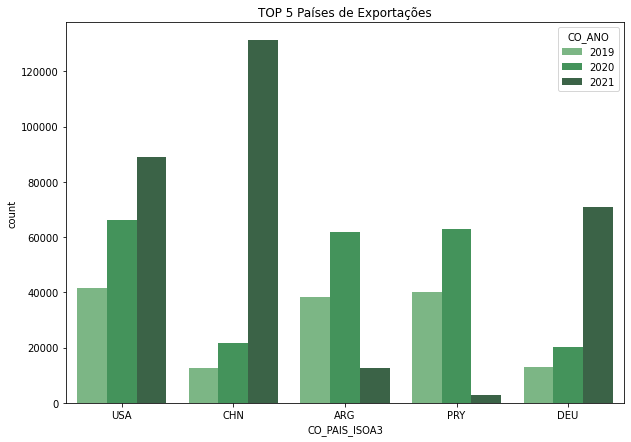

In [107]:
# contagem de exportações por país TOP5
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_exp, x='CO_PAIS_ISOA3', palette="Greens_d", hue='CO_ANO',
              order=df_exp.CO_PAIS_ISOA3.value_counts().iloc[:5].index).set_title('TOP 5 Países de Exportações')

Text(0.5, 1.0, 'TOP 5 Países de Importações')

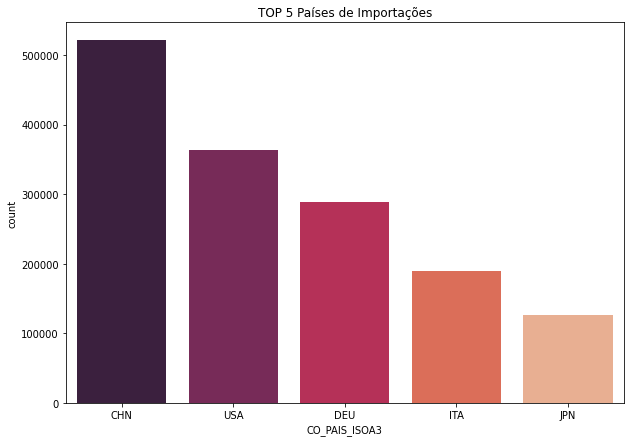

In [108]:
# contagem de importações por país TOP5 dos ultimos 2 anos
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_imp, x='CO_PAIS_ISOA3', palette="rocket", 
              order=df_imp.CO_PAIS_ISOA3.value_counts().iloc[:5].index).set_title('TOP 5 Países de Importações')

Text(0.5, 1.0, 'TOP 5 Países de Exportações')

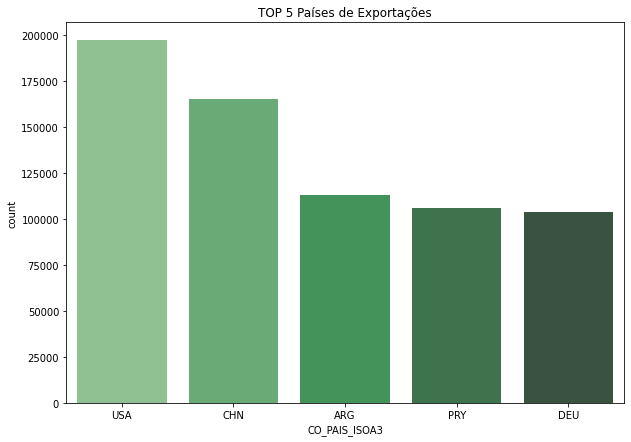

In [109]:
# contagem de exportações por país TOP5 nos ultimos 2 anos
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_exp, x='CO_PAIS_ISOA3', palette="Greens_d",
              order=df_exp.CO_PAIS_ISOA3.value_counts().iloc[:5].index).set_title('TOP 5 Países de Exportações')

Text(0.5, 1.0, 'TOP 5 Peso Médio por Importação')

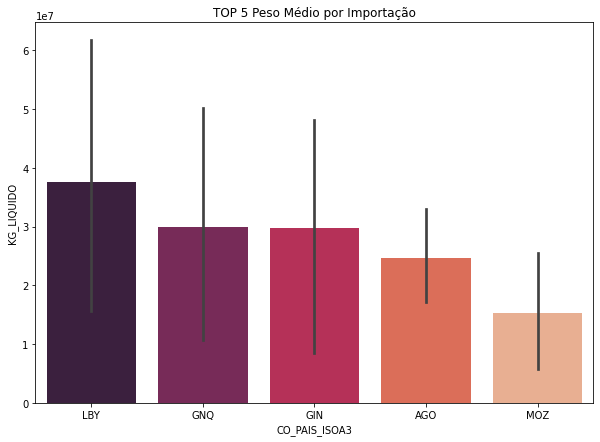

In [121]:
# média de peso por importação dos países - TOP5
rcParams['figure.figsize'] = 10, 7
plot_order = df_imp.groupby('CO_PAIS_ISOA3')['KG_LIQUIDO'].mean().sort_values(ascending=False).index.values
sns.barplot(data=df_imp, x='CO_PAIS_ISOA3',  y='KG_LIQUIDO', palette="rocket", 
            order=plot_order[1:6]).set_title('TOP 5 Peso Médio por Importação')

Text(0.5, 1.0, 'TOP 5 Peso Médio por Exportação')

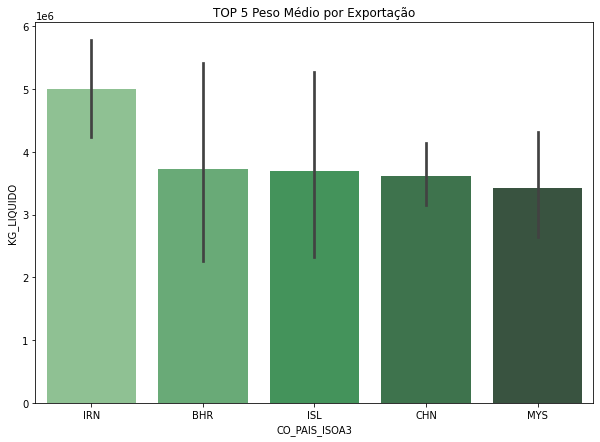

In [122]:
# média de peso por exportação dos países - TOP5
rcParams['figure.figsize'] = 10, 7
plot_order = df_exp.groupby('CO_PAIS_ISOA3')['KG_LIQUIDO'].mean().sort_values(ascending=False).index.values
sns.barplot(data=df_exp, x='CO_PAIS_ISOA3',  y='KG_LIQUIDO', palette="Greens_d",
            order=plot_order[1:6]).set_title('TOP 5 Peso Médio por Exportação')

Text(0.5, 1.0, 'TOP 5 Valor Total por Importação')

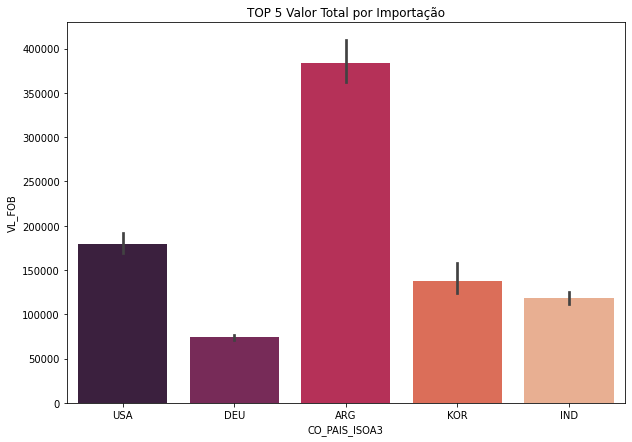

In [123]:
# valor total gasto em importações dos países - TOP5
rcParams['figure.figsize'] = 10, 7
plot_order = df_imp.groupby('CO_PAIS_ISOA3')['VL_FOB'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df_imp, x='CO_PAIS_ISOA3',  y='VL_FOB', palette="rocket",
            order=plot_order[1:6]).set_title('TOP 5 Valor Total por Importação')

In [ ]:
# valor total gasto em exportações dos países - TOP5
rcParams['figure.figsize'] = 10, 7
plot_order = df_exp.groupby('CO_PAIS_ISOA3')['VL_FOB'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df_exp, x='CO_PAIS_ISOA3',  y='VL_FOB', palette="Greens_d",
            order=plot_order[1:6]).set_title('TOP 5 Valor Total por Importação')

## Estados

Text(0.5, 1.0, 'TOP 5 Estados de Importações')

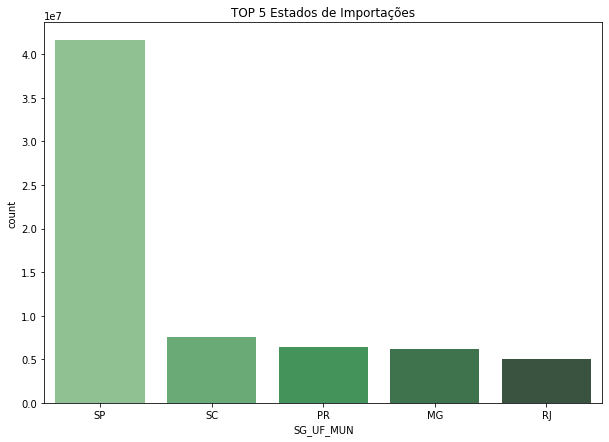

In [11]:
# contagem de importações por estados TOP5
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_imp, x='SG_UF_MUN', palette="Greens_d", 
              order=df_imp.SG_UF_MUN.value_counts().iloc[:5].index).set_title('TOP 5 Estados de Importações')

Text(0.5, 1.0, 'TOP 5 Estados de Exportações')

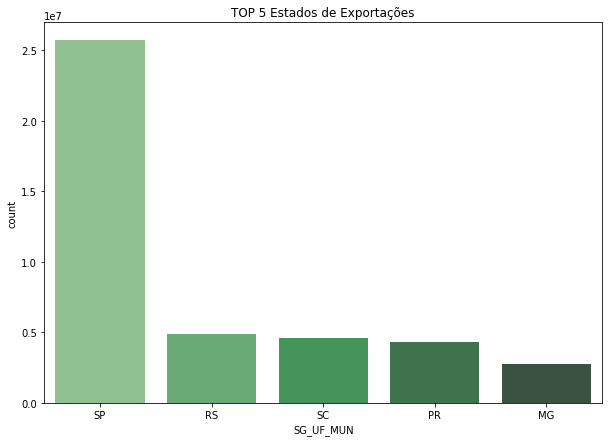

In [12]:
# contagem de importações por estados TOP5
rcParams['figure.figsize'] = 10, 7
sns.countplot(data=df_exp, x='SG_UF_MUN', palette="Greens_d", 
              order=df_exp.SG_UF_MUN.value_counts().iloc[:5].index).set_title('TOP 5 Estados de Exportações')